
Importing libraries for data manipulation and visualization


In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat



Reading the CSV file into a dataframe. Upon investigation, I found some of the entries to be incomplete due to limited evidence. Then, each column of the dataframe is transformed into a series for accessibility.


In [3]:

db = pd.read_csv('../csv/DataBreaches(2004-2021).csv')
db.drop(db.loc[db['Organization type']=='personal and demographic data about residents and their properties of US'].index, inplace=True)
db.drop(db.loc[db['Entity'] == 'Unknown agency(believed to be tied to United States Census Bureau)'].index, inplace=True)
db.drop(db.loc[db['Entity'] == 'Massive American business hack including 7-Eleven and Nasdaq'].index, inplace=True)
db.drop(db.loc[db['Method']=='intentionally lost'].index, inplace=True)
db.drop(db.loc[db['Method']=='misconfiguration/poor security'].index, inplace=True)
db.drop(db.loc[db['Method']=='unknown'].index, inplace=True)
db.drop(db.loc[db['Method']=='improper setting, hacked'].index,inplace=True)

#I changed the method of this entry because I found supported articles that argues against the reported value.
db_se = db.loc[(db['Method']=='poor security/inside job') & (db['Entity']=='Marriott International')].index.item()
db.loc[db_se,'Method'] = 'social engineering'

company=db['Entity']
year=db['Year']
records=db['Records']
organization_type=db['Organization type']
method = db['Method']

#I changed the year of two enties for consistency and based on public discovery 
clean_year=year.replace('2018-2019',2019)
clean_year=clean_year.replace('2014 and 2015',2015)
db['Year'] = clean_year.astype(int)
year = db['Year']



I found that my dataset has 266 unique companies with 48 unique types of organizations using the len function on top of Pandas's unique function. Then, I borrowed the mean function from statistics to calculate the average of compromised records: 4,243,665. Next, I used Python's sum function to calculate the total number of compromised records: 12,052,009,802. Lastly, I found the minimum and maximum amounts of compromised records. The smallest amount of compromised records is 6,700, and the largest amount of compromised records is 3,000,000,000.


In [4]:

company_num_unique=len(company.unique())
organization_type_num_unique=len(organization_type.unique())
print('The number of unique companies breached:',company_num_unique)
print('The number of unique types of organizations:', organization_type_num_unique)

avg = stat.mean(records)
print('The average of compromised records:',avg,)
sum_records = sum(records)
print('The total amount of compromised records:',sum_records)

min_records = min(records)
print('The smallest amoumt of compromised records:',min_records)

max_records = max(records)
print('The largest amount of compromised records:',max_records)

attack_company=[]
for company in company.value_counts()[lambda x: x >= 2].index:
    attack_company.append(company)
attack_company_series= pd.Series(attack_company)
print('The number of companies that have been breached at least twiced:',len(attack_company_series),'\n')
    

The number of unique companies breached: 266
The number of unique types of organizations: 48
The average of compromised records: 42436654.23239437
The total amount of compromised records: 12052009802
The smallest amoumt of compromised records: 6700
The largest amount of compromised records: 3000000000
The number of companies that have been breached at least twiced: 13 




The series_replace function replaces a number of strings with a given a string. The series_query function prints the companies' names when the method or organization type is found within the dataset.


In [5]:

def series_replace(db_data,cate,string):
    '''A function that replaces a number of strings with a given a string'''
    data_mod=db_data.replace(cate,string).str.lower()
    data_mod.sort_values(inplace = True)
    return data_mod

def series_query(series,db_data,string):
    '''A function that prints the companies' names when the method or organization type is found within the dataset'''
    for var, company in zip(series,db_data):
        if var == string:
            print(company)
    return
    


To clean up the data, I researched some of the data breaches to see if the reported method was accurate compared to non-Wikipedia articles. This is a plot that shows the number of occurrences per method of breach. As it is shown in the graph, hacking was the most frequent method utilized in data breaches between 2004 and 2021. On the other hand, an accidental upload or unprotected API was the least frequent method exploited in data breaches between 2004 and 2021.


Text(0.5, 1.0, 'Number of Occurrences vs Method of the Breach')

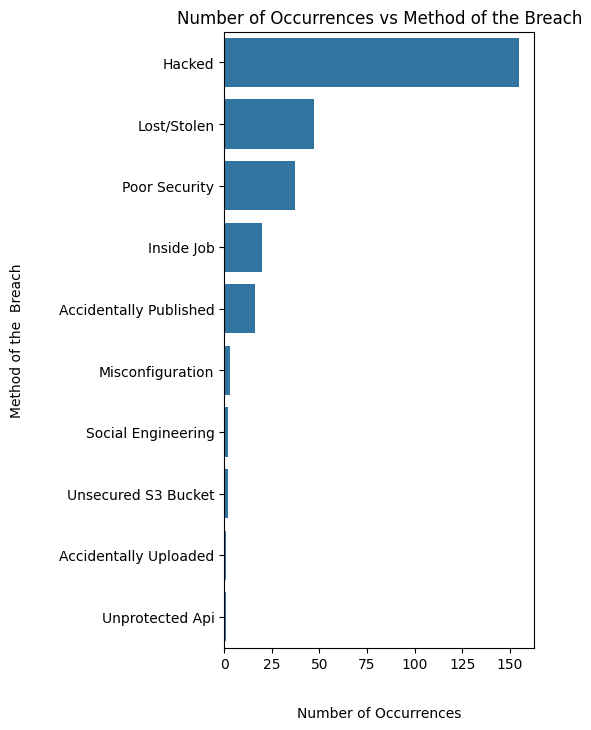

In [6]:

method=series_replace(db['Method'],['publicly accessible Amazon Web Services (AWS) server'],'unsecured S3 bucket')
method=series_replace(method,['accidentally exposed','data exposed by misconfiguration','rogue contractor'],'misconfiguration')
method=series_replace(method,['poor security / hacked'],'poor security')
method=series_replace(method,['inside job, hacked','poor security/inside job'],'inside job')
method=series_replace(method,['lost / stolen media','lost / stolen computer'],'lost/stolen')
method = pd.Series([i.title()for i in method])

plt.figure(figsize=(4,8))
sns.countplot(y=method.values,order=method.value_counts().index)
plt.ylabel('Method of the  Breach',labelpad=25)
plt.xlabel('Number of Occurrences',labelpad=25)
plt.title('Number of Occurrences vs Method of the Breach')



To clean up the data, I researched some of the companies to find their proper industries. This is a plot that shows the number of occurrences per type of organization. As it is shown in the graph, healthcare edged out web as the most frequent type of organization to experience a data breach. On the other hand, there is a five-way between advertising, fashion, data broker, ticket distribution, and market analysis for the least frequent type of organization to experience a data breach.


Text(0.5, 1.0, 'Number of Occurrences vs Type of Organization')

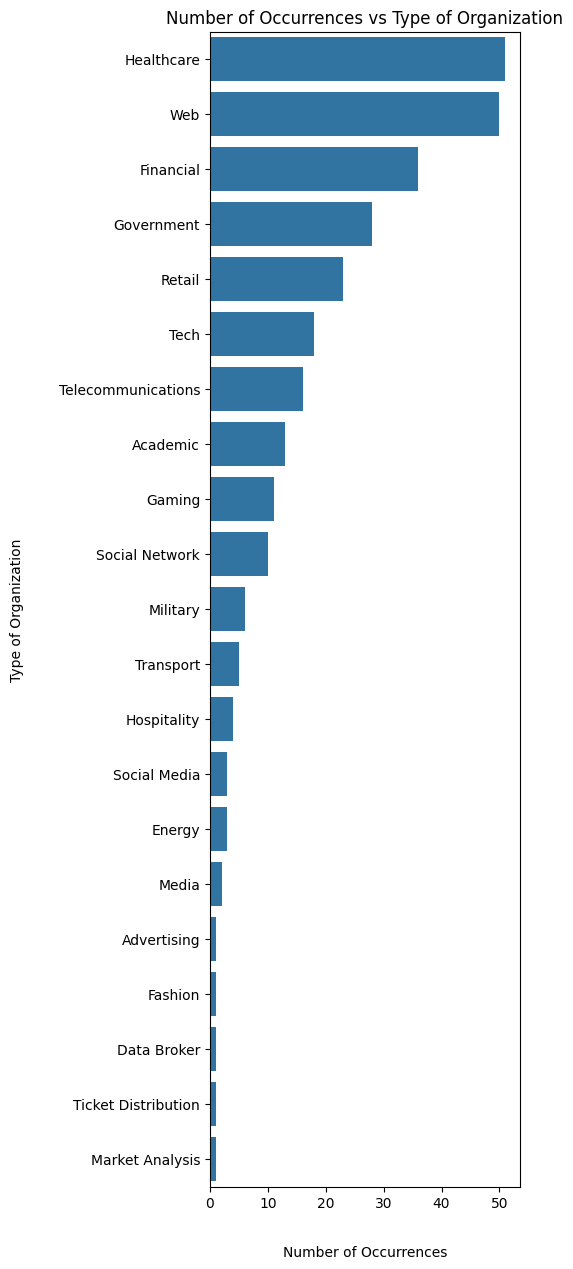

In [7]:

organization_type=series_replace(db['Organization type'],['telecoms','telecom','mobile carrier','online marketing'],'telecommunications')
organization_type=series_replace(organization_type,['tech, retail','tech, web','local search'],'tech')
organization_type=series_replace(organization_type,['government, database','government, military','military, healthcare','government, healthcare','clinical laboratory'],'healthcare')
organization_type=series_replace(organization_type,['financial service company','financial, credit reporting','banking'],'financial')
organization_type=series_replace(organization_type,['game'],'gaming')
organization_type=series_replace(organization_type,['special public corporation'],'government')
organization_type=series_replace(organization_type,['phone accessories','consumer goods','shopping'],'retail')
organization_type=series_replace(organization_type,['educational services'],'academic')
organization_type=series_replace(organization_type,['restaurant','hotel'],'hospitality')
organization_type=series_replace(organization_type,['web, gaming','web, military'],'web')
organization_type=series_replace(organization_type,['web, tech'],'social media')
organization_type=series_replace(organization_type,['question & answer','social networking'],'social network')

organization_type=pd.Series([i.title()for i in organization_type])

plt.figure(figsize=(4,15))
sns.countplot(y = organization_type.values,order=organization_type.value_counts().index)
plt.ylabel('Type of Organization',labelpad=25)
plt.xlabel('Number of Occurrences',labelpad=25)
plt.title('Number of Occurrences vs Type of Organization')



This is a plot that shows the number of occurrences per year. As it is shown in the graph, the most number of data breaches occurred in 2011, whereas the least number of data breaches occurred in 2004.


Text(0.5, 1.0, 'Year of the Breach vs Number of Occurrences')

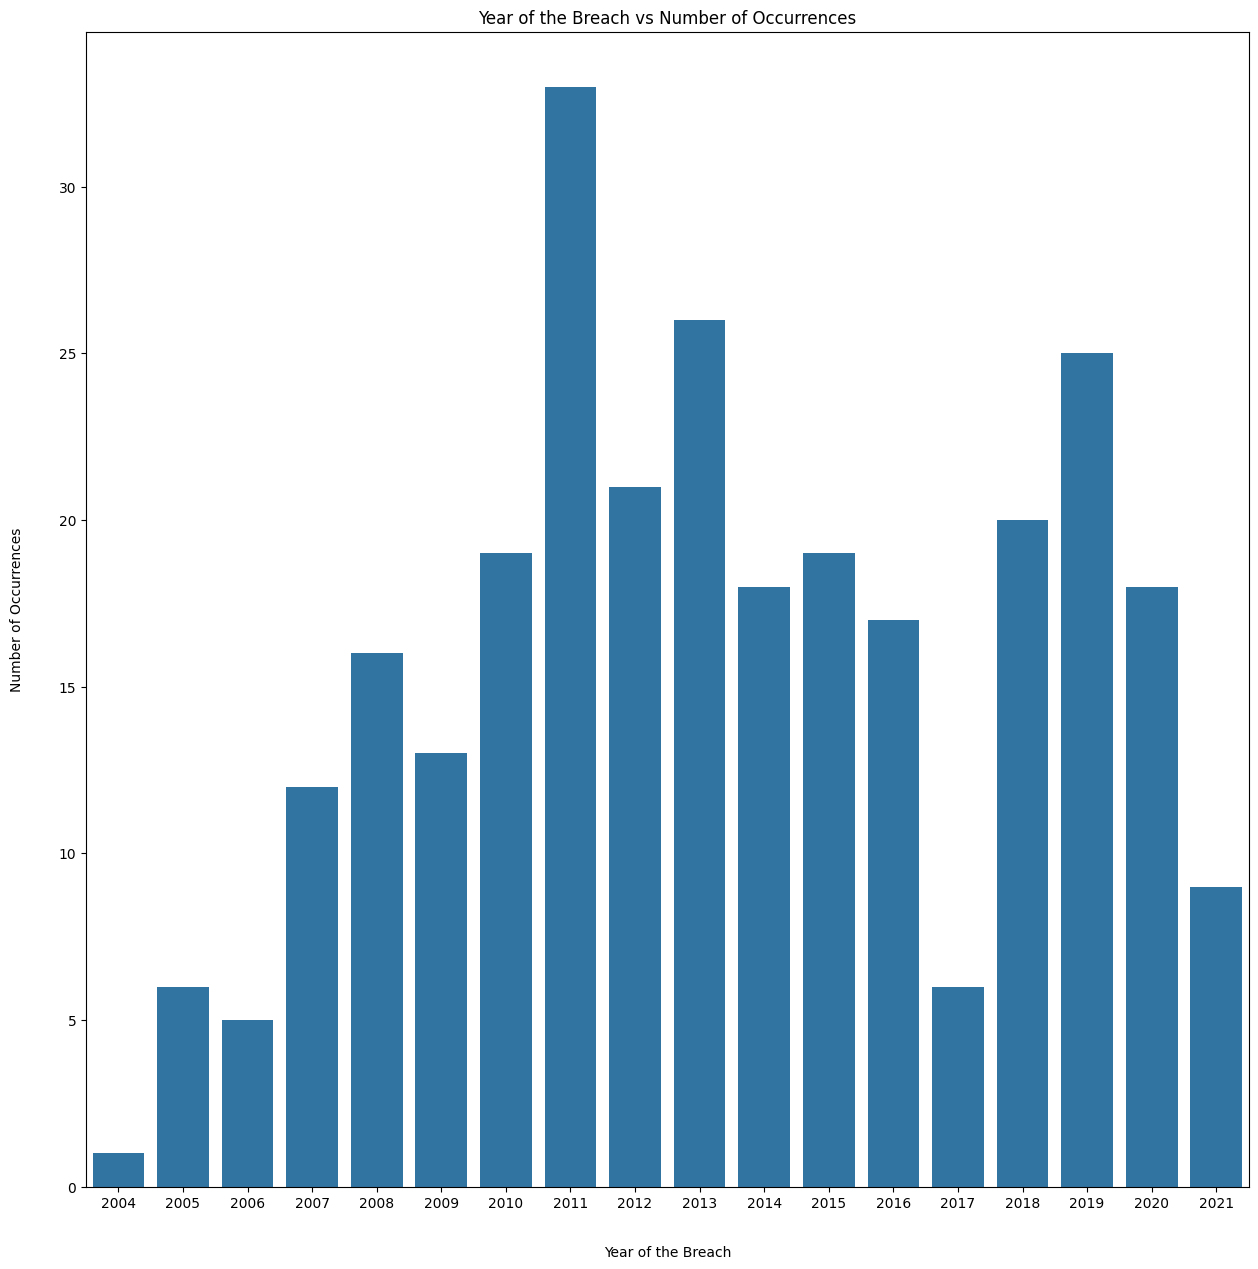

In [8]:

year_order=[i for i in range(2004,2022)]
plt.figure(figsize=(15,15))
sns.countplot(x = year.values,order=year_order)
plt.xlabel('Year of the Breach',labelpad=25)
plt.ylabel('Number of Occurrences',labelpad=25)
plt.title('Year of the Breach vs Number of Occurrences')



This is a plot that shows the companies that have been breached at least twice. As it is shown in the graph, Facebook took the top spot with 5 breaches, whereas there is a 10-way tie for companies with 2 breaches.


Text(0.5, 1.0, 'Companies that have been breached at least 2 times')

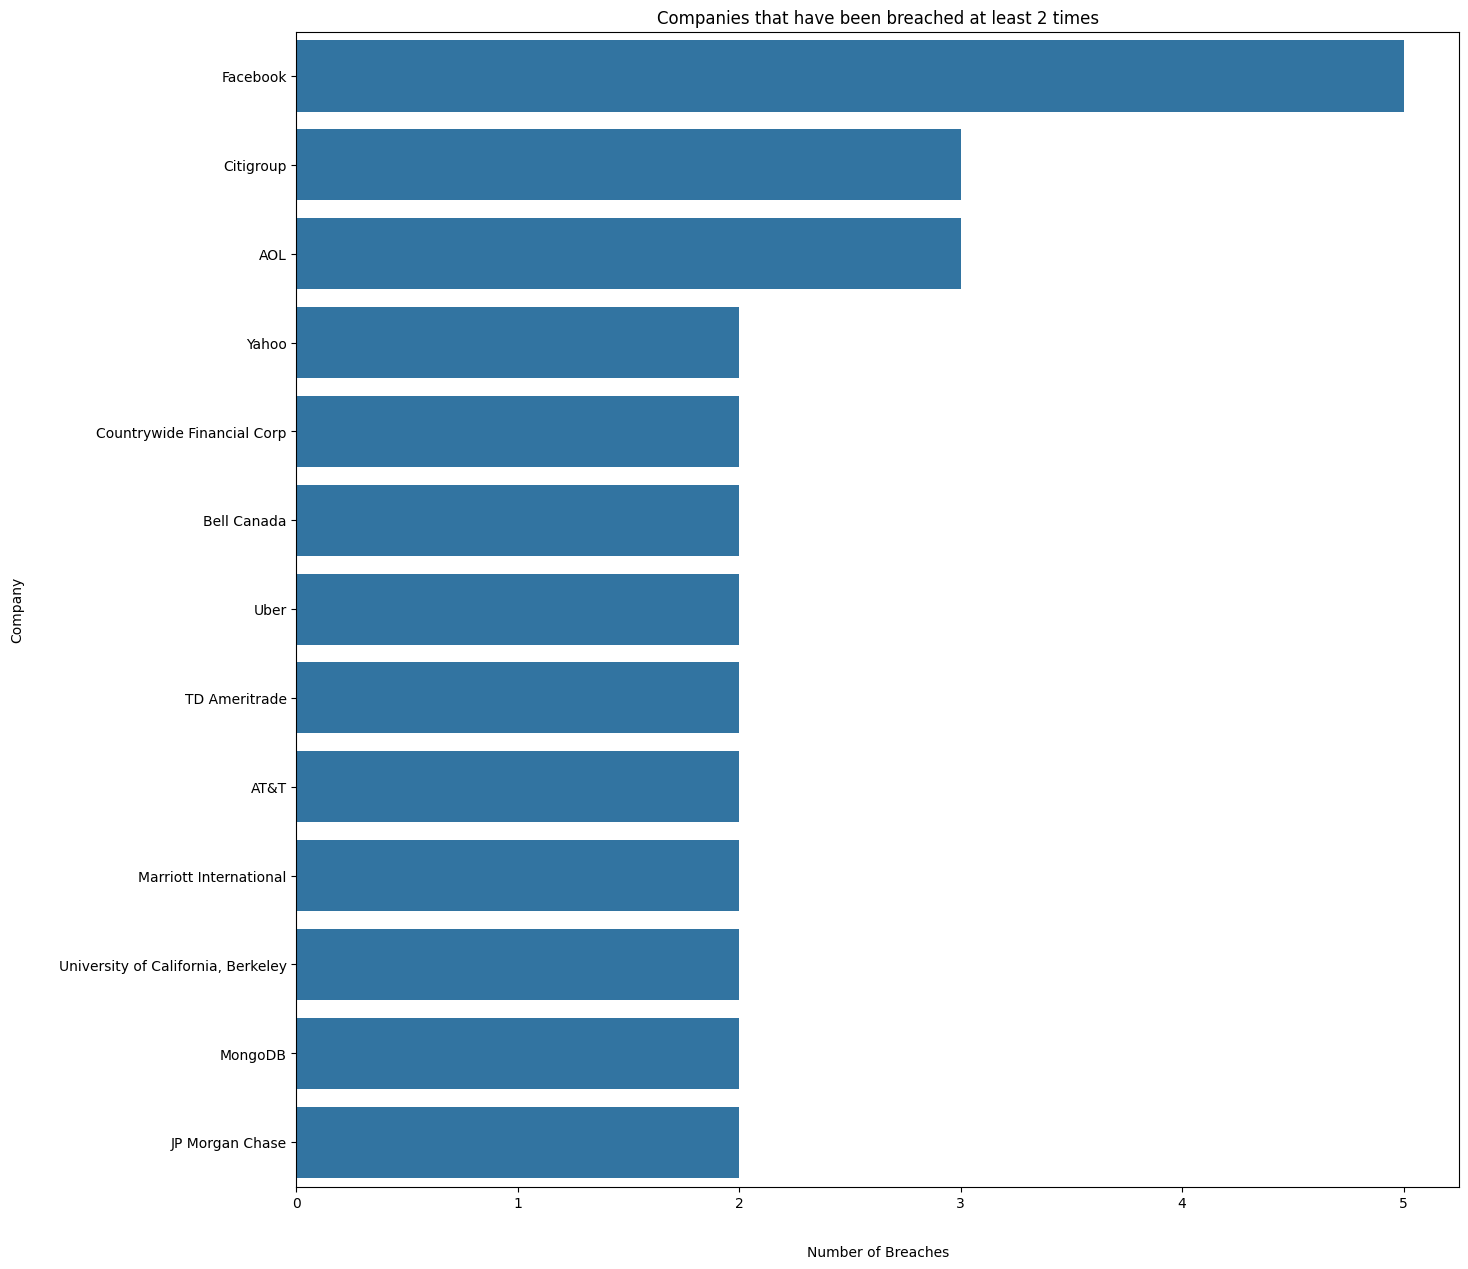

In [9]:

comp_att= db['Entity'].value_counts()[lambda x: x >= 2].to_frame('Number of Breaches').rename_axis('Company').reset_index()

plt.figure(figsize=(15,15))
sns.barplot(data = comp_att, y = 'Company', x = 'Number of Breaches')
plt.ylabel('Company',labelpad=25)
plt.xlabel('Number of Breaches',labelpad=25)
plt.title('Companies that have been breached at least 2 times')



This is a plot that shows the annual averages between 2004 and 2021. As it is shown in the graph, the largest average of compromised records occurred in 2019 with 137,113,833, whereas the smallest average of compromised records occurred in 2004 with 510,000.


    Year    Records
0   2004     510000
1   2005    7804166
2   2006   10060000
3   2007   12773867
4   2008    4316656
5   2009   19651383
6   2010     841077
7   2011    6902670
8   2012   12801887
9   2013  133439802
10  2014   47276555
11  2015    6421971
12  2016   31797830
13  2017   42461146
14  2018   63778297
15  2019  137113833
16  2020   42921351
17  2021   27798803 



Text(0.5, 1.0, 'Year of the Breach vs Yearly Average of compromised records')

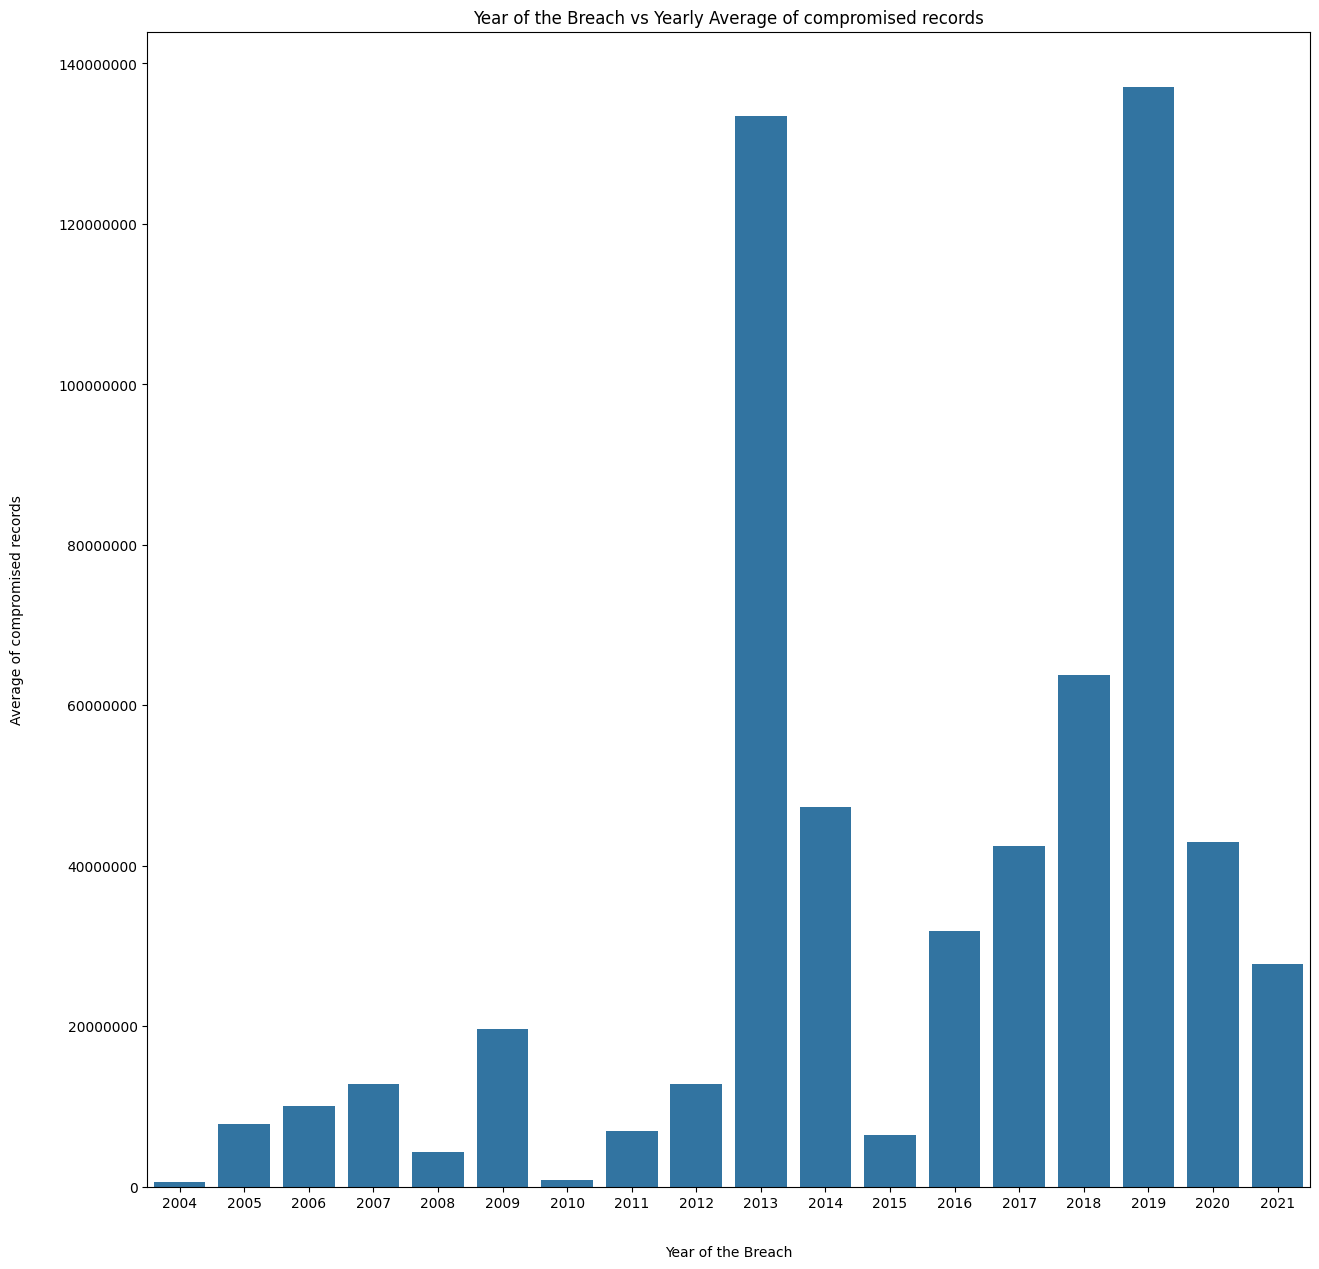

In [10]:

yearly_avg=db.groupby('Year')['Records'].mean().to_frame().astype('int64').reset_index()
print(yearly_avg,'\n')

plt.figure(figsize=(15,15))
sns.barplot(x='Year', y='Records', data=yearly_avg)
plt.ticklabel_format(style='plain', axis='y' )
plt.xlabel('Year of the Breach',labelpad=25)
plt.ylabel('Average of compromised records',labelpad=25)
plt.title('Year of the Breach vs Yearly Average of compromised records')



Here is where I begin building a pivot table of annual averages of compromised records pertaining to Facebook. Then, I output the derived pivot table to a CSV file. 


In [11]:

db_facebook_filter=db[db['Entity'].str.contains("Facebook")].reset_index(drop=True)
fb_rec_avg=db_facebook_filter.groupby(['Year'])[['Records']].mean()

fb_rec_avg.to_csv('../csv/FB_record_averages.csv')
